# Линейная регрессия

Выполните подготовку данных для решения задачи регрессии. Проведите регрессию методом наименьших квадратов statsmodel и линейной регрессии scikit-learn. Качество оценить минимум по 3 критериям качества для регрессии: MAE, MSE, RMSE, MAPE и др.

**Описание набора данных:** 

- *store_sales(in millions)* - продажи (в миллионах долларов)
- *unit_sales(in millions)* - количество единиц продажи(в миллионах) в магазинах
- *total_children* - число детей в доме
- *num_children_at_home* - число детей в доме в соответствии с данными заполненными клиентами
- *avg_cars_at home(approx).1* - среднее количество автомобилей в доме(приблизительно)
- *gross_weight* - общий вес товара
- *recyclable_package* - продукт питания в упаковке, которая подлежит вторичной переработке
- *low_fat* - продукт с низким содержанием жира
- *units_per_case* - единицы товара доступные на полках магазина
- *store_sqft* - площадь магазина (в квадратных футах)
- *coffee_bar* - кофейный бар
- *video_store* - магазин видео
- *salad_bar* - салат-бар
- *prepared_food* - готовая еда
- *florist* - цветочный магазин
- *cost* - стоимость привлечения клиентов в долларах

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

from sklearn.preprocessing import StandardScaler # шкалирование данных

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

## Проведем EDA (Exploratory Data Analysis) - первичный анализ данных

In [4]:
def eda_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )
    
    return x

In [5]:
col = df.select_dtypes(include=["number"]).columns
eda_info(df[col])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
id,0.0,0.00,360335.00,180167.500000,180167.50,1.082020e+10,36033.50,324301.50,90083.75,270251.25
store_sales(in millions),0.0,0.51,22.92,6.337376,5.78,1.094273e+01,2.32,11.04,3.72,8.40
unit_sales(in millions),0.0,1.00,6.00,3.043881,3.00,6.157163e-01,2.00,4.00,3.00,4.00
total_children,0.0,0.00,5.00,2.456482,2.00,2.217097e+00,0.00,4.00,1.00,4.00
num_children_at_home,0.0,0.00,5.00,0.689390,0.00,1.475575e+00,0.00,3.00,0.00,1.00
avg_cars_at home(approx).1,0.0,0.00,4.00,2.203813,2.00,1.175692e+00,1.00,4.00,1.00,3.00
gross_weight,0.0,6.00,21.90,13.822071,13.60,2.129631e+01,7.71,20.30,9.71,17.70
recyclable_package,0.0,0.00,1.00,0.568086,1.00,2.453649e-01,0.00,1.00,0.00,1.00
low_fat,0.0,0.00,1.00,0.327797,0.00,2.203467e-01,0.00,1.00,0.00,1.00
units_per_case,0.0,1.00,36.00,18.972706,20.00,1.043036e+02,5.00,33.00,10.00,28.00


Пропусков в таблице нет, какие то явные выбросы отсутствуют. В целом данные в хорошем состоянии.

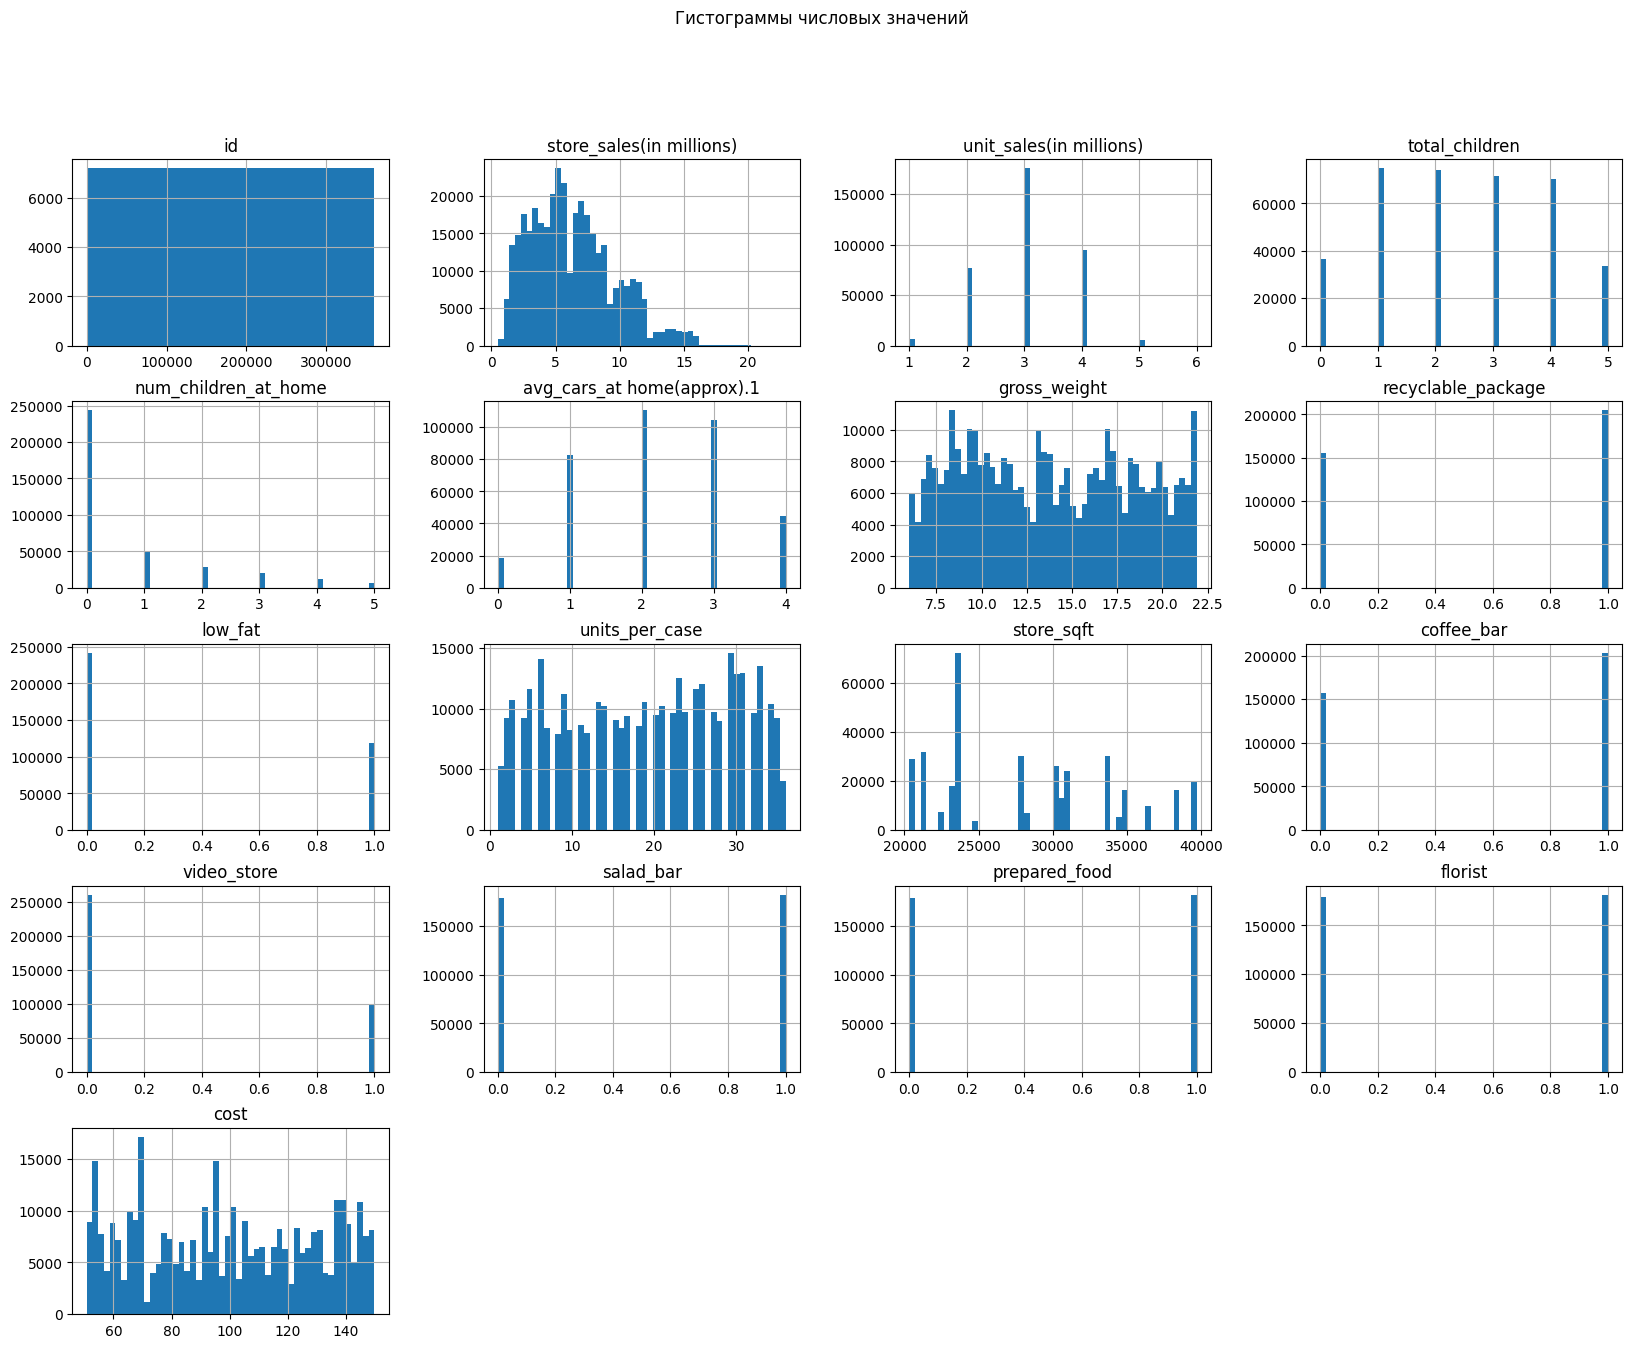

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Гистограммы числовых значений")
plt.show()

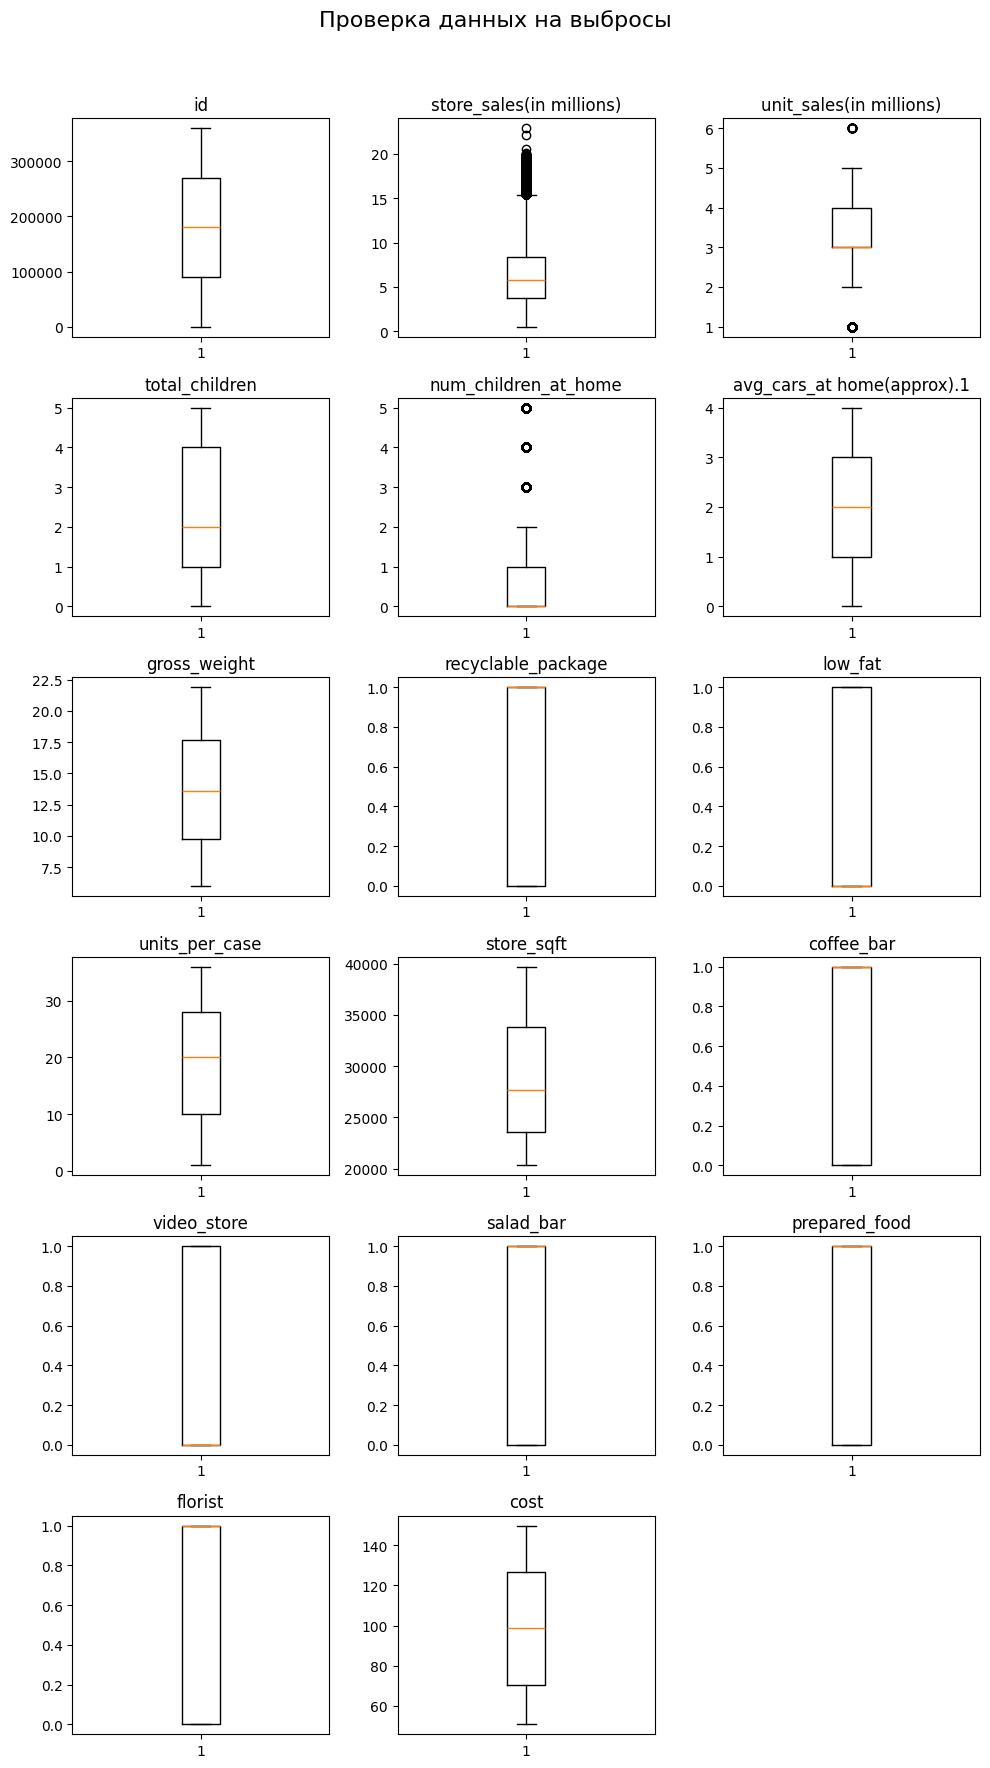

In [7]:
n = len(col)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

Признаки *store_sales(in millions), unit_sales(in millions), num_children_at_home* имеют выбросы. Исправим это.

In [8]:
# Обработаем выбросы
def outliers_in_data(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    
    return df


df = outliers_in_data(df, ["store_sales(in millions)",
                           "unit_sales(in millions)", 
                           "num_children_at_home"
                           ],
)

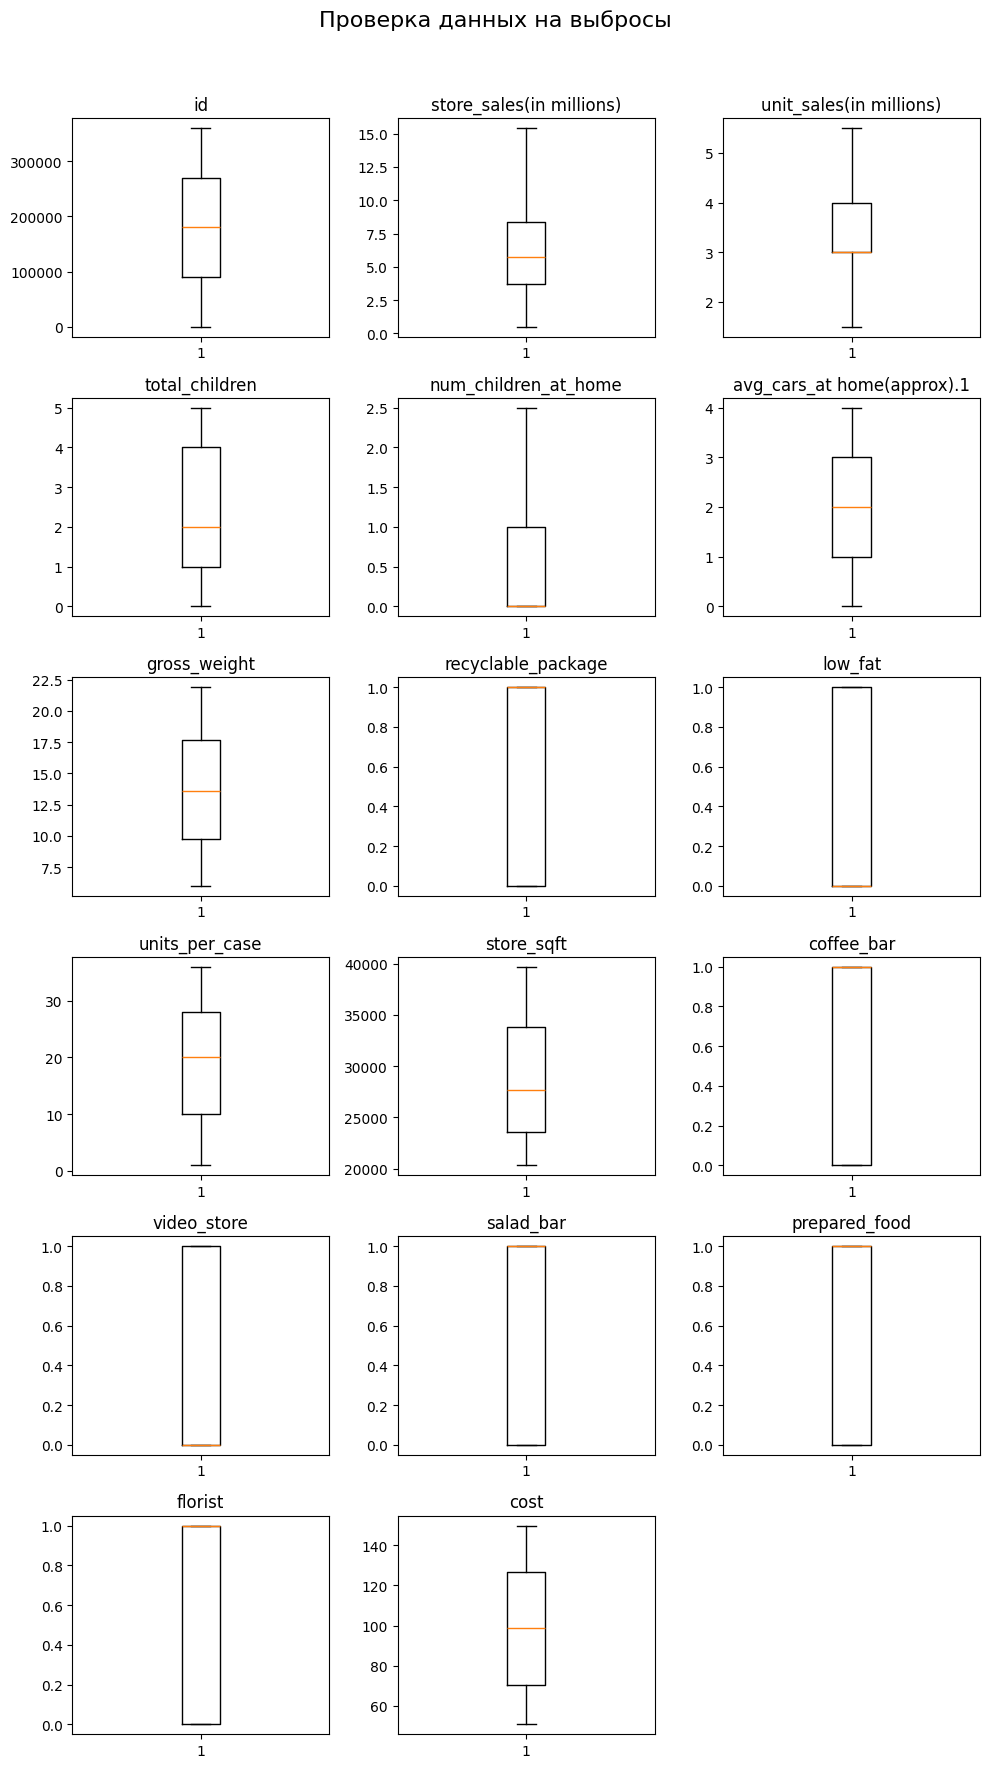

In [9]:
n = len(col)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 3 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

В данных нет выбросов и пропусков.

## Рассмотрим целевую переменную cost

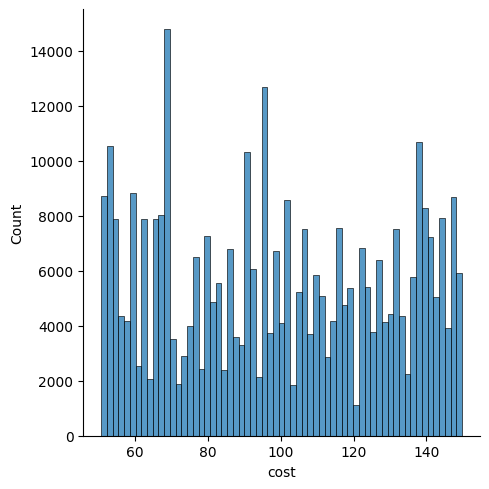

In [11]:
sns.displot(df.cost);

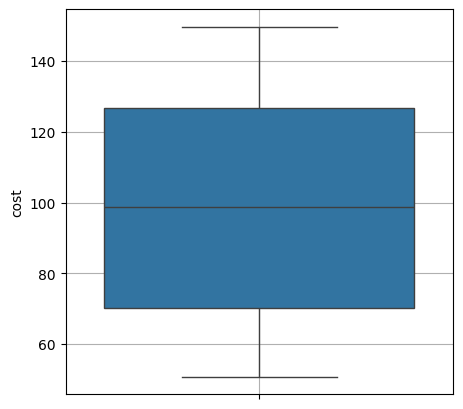

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['cost'])
plt.grid()
plt.show()

По целевой переменной также нет каких либо нареканий, пропусков и выбросов нет.

## Построим матрицу корреляций

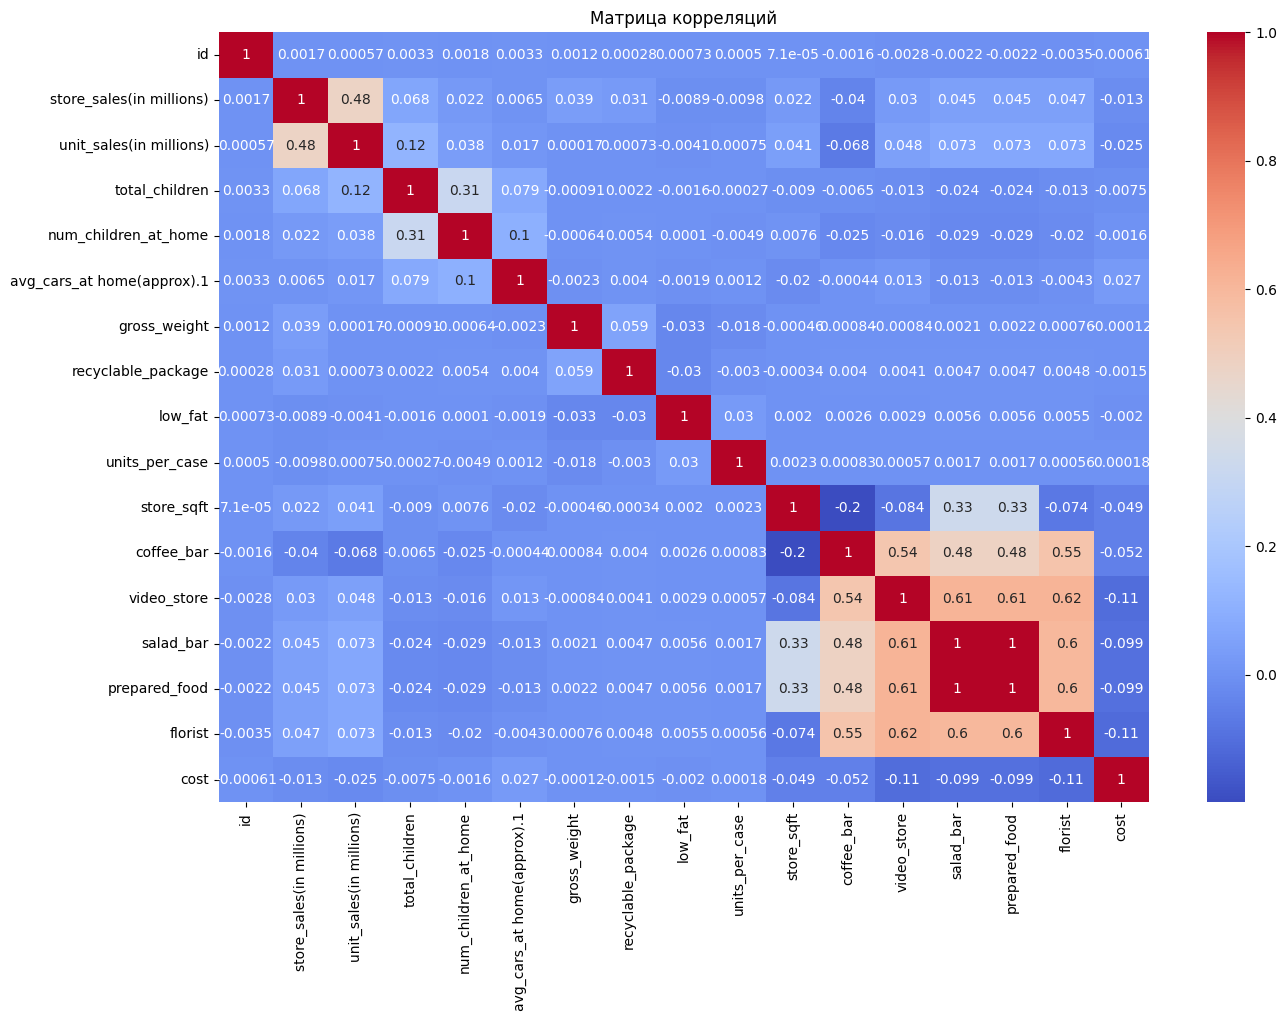

In [13]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим что между признаками нет корреляции более 0.7, значит признаки имеют среднюю степень корреляции. Оставим все признаки для дальнейшего обучения модели.

## Разделим на тренировочную и тестовую выборки

In [14]:
X = df.drop(columns=['id', 'cost'])
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (288268, 15)
Размер тестовой выборки (признаки): (72068, 15)
Размер тренировочной выборки (целевой признак): (288268,)
Размер тестовой выборки (целевой признак): (72068,)


In [ ]:
# Отшкалируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.776835,-0.069928,1.035809,1.595635,-0.187598,-0.951423,0.871623,-0.69827,1.276387,-0.766889,-1.138350,-0.620391,-1.010076,-1.010153,0.993148
1,0.210189,-0.069928,1.035809,-0.627661,-0.187598,-1.126877,-1.147284,1.43211,-1.563225,-1.316131,-1.138350,-0.620391,-1.010076,-1.010153,-1.006899
2,0.228468,-0.069928,1.035809,2.151460,0.735024,1.598079,0.871623,-0.69827,1.178469,-0.080798,0.878465,1.611886,0.990024,0.989949,0.993148
3,-0.511827,-0.069928,-0.307077,-0.627661,-1.110221,0.038486,0.871623,-0.69827,0.590964,0.438964,0.878465,1.611886,0.990024,0.989949,0.993148
4,-1.142449,-0.069928,1.707252,-0.627661,-0.187598,1.143198,0.871623,-0.69827,-1.171554,-0.767727,-1.138350,-0.620391,-1.010076,-1.010153,-1.006899


## Обучение моделей

Обучим 2 модели:

- Из библиотеки `statsmodels` модель `OLS`;
- Из библиотеки `scikit-learn` модель `LinearRegression`.

### Модель OLS

In [17]:
# Добавление константы к матрице признаков
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

# Создание и обучение модели линейной регрессии
model_ols = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = model_ols.predict(X_test_ols)

# Вывод результатов регрессии
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     373.9
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:08:59   Log-Likelihood:            -1.3860e+06
No. Observations:              288268   AIC:                         2.772e+06
Df Residuals:                  288252   BIC:                         2.772e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.6413      0.055   1804.683      0.000      99.533      99.749
x1             0.0747      0.063      1.186      0.235      -0.049       0.198
x2            -0.3079      0.064     -4.828      0.000      -0.433      -0.183
x3            -0.3138      0.059     -5.352      0.000      -0.429      -0.199
x4            -0.0923      0.058     -1.580      0.114      -0.207       0.022
x5             0.8205      0.056     14.757      0.000       0.712       0.930
x6            -0.0276      0.055     -0.498      0.618      -0.136       0.081
x7            -0.0037      0.055     -0.066      0.947      -0.112       0.105
x8            -0.0401      0.055     -0.725      0.469      -0.148       0.068
x9             0.0262      0.055      0.473      0.636      -0.082       0.134
x10           -1.7602      0.069    -25.641      0.000      -1.895      -1.626
x11            0.5478      0.074      7.369      0.000       0.402       0.693
x12           -2.2670      0.081    -28.124      0.000      -2.425      -2.109
x13            7.1504      2.965      2.412      0.016       1.340      12.961
x14           -6.8783      2.965     -2.320      0.020     -12.689      -1.068
x15           -2.4695      0.079    -31.124      0.000      -2.625      -2.314
==============================================================================
Omnibus:                   261595.382   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17412.315
Skew:                           0.032   Prob(JB):                         0.00
Kurtosis:                       1.798   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Модель LinearRegression

In [21]:
# Создание и обучение модели линейной регрессии
model_lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


### Сводная таблица оценки качества моделей

In [24]:
pd.DataFrame(
    {'RMSE': [root_mean_squared_error(y_test, y_pred_ols), 
              root_mean_squared_error(y_test, y_pred_lr)], 
     'MSE' : [mean_squared_error(y_test, y_pred_ols),
              mean_squared_error(y_test, y_pred_lr)],
     'MAE' : [mean_absolute_error(y_test, y_pred_ols),
              mean_absolute_error(y_test, y_pred_lr)]},
    index=['OLS', 'LinearRegression']
)

,RMSE,MSE,MAE
OLS,29.657276,879.554017,25.602369
LinearRegression,29.657276,879.554017,25.602369


Модели показывают абсолютно одинаковые результаты, выберем в качестве нашей модели - **LinearRegression**.

## Важность признаков модели LinearRegression.

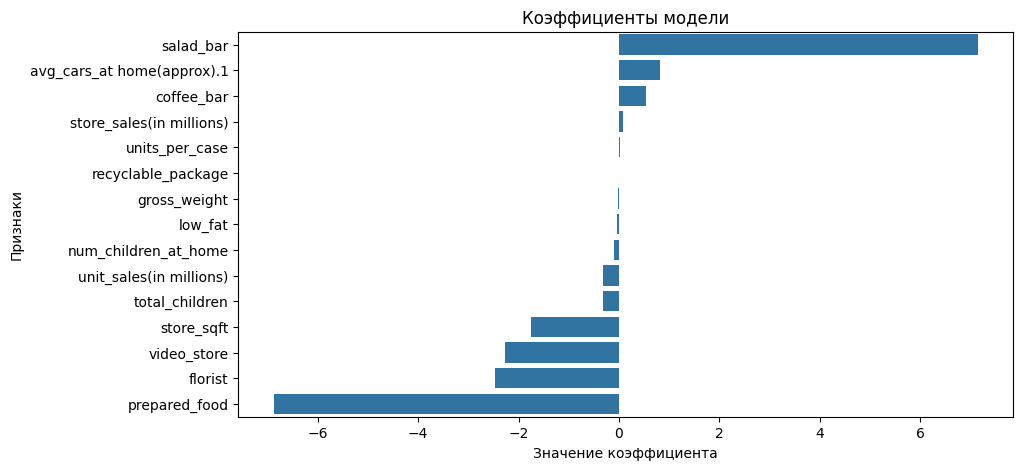

In [30]:
# Получение коэффициентов линейной регрессии
coeff = pd.DataFrame(
    {"Признаки": X.columns, "Коэффициенты": model_lr.coef_}
).sort_values(by="Коэффициенты", ascending=False)

# Визуализация коэффициентов
plt.figure(figsize=(10, 5))
sns.barplot(coeff, x="Коэффициенты", y="Признаки")
plt.xlabel("Значение коэффициента")
plt.ylabel("Признаки")
plt.title("Коэффициенты модели")
plt.show()

In [31]:
coeff.sort_values(by="Коэффициенты", ascending=False)

,Признаки,Коэффициенты
12,salad_bar,7.150387
4,avg_cars_at home(approx).1,0.820536
10,coffee_bar,0.547775
0,store_sales(in millions),0.074724
8,units_per_case,0.026152
6,recyclable_package,-0.003654
5,gross_weight,-0.027605
7,low_fat,-0.040075
3,num_children_at_home,-0.092285
1,unit_sales(in millions),-0.307885


На предсказание модели в наибольшей степени влияют такие признаки, как *salad_bar, prepared_food, florist, video_store, store_sqft*.